## Independent t-tests

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an independent t-test.

### Welch's t-test

- $\bar{x}$ and $\bar{y}$ are the sample means
- $s_x$ and $s_y$ are the sample variances
- $n_x$ and $n_y$ are the sample sizes

$$t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}}$$




### Note on Welch's t-test and p-values

The Welch-Saitterthwaite equation is used to calculate the approximate degrees of freedom for a linear combination of independent sample variances.

$$\nu = \frac{u^{4}} {\sum_{i=1}^{k}
               {\frac{a_{i}^{4} s_{i}^{4}} {\nu_{i}}}}$$

Where:

- $k$ is the number of samples
- $s_i$ is the standard deviation of the $i$th sample
- $\nu_i$ is the number of degrees of freedom for the $i$th sample
- $a_i$ the sensitivity coefficient of the $i$th sample
- $u$ is the standard uncertainty


#### Student's t-test

Student's independent t-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e.,
$\sigma^2_x \approx \sigma^2_x$), making it less robust.

The formula is the same as Welch's, except that it uses a pooled variance $s_p$ in place of individual sample variances.

$$t = \frac{\bar{x} - \bar{y}}{s_p{\sqrt{\frac{2}{n}}}}$$

#### Examples (Independent t-tests)

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns

##### Example 1 (Independent T-Test)

In [2]:
penguins = sns.load_dataset('penguins').dropna()

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [5]:
adelie = penguins[penguins.species == 'Adelie']

In [6]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [7]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [8]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

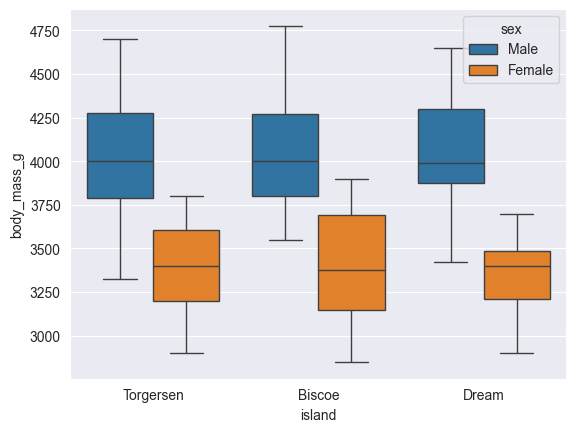

In [9]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look:

In [10]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
m = adelie[adelie.sex =='Male']['body_mass_g'].to_numpy()/1000
fbar = f.mean()
mbar = m.mean()
sf = f.var(ddof=1)
sm = m.var(ddof=1)
nf = f.size
nm = m.size
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)

def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))
df = ws_eqn(sf, sm, nf, nm)
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

np.float64(6.402319748031518e-26)

In [11]:
-np.log10(p)

np.float64(25.193662639886046)

In [12]:
st.ttest_ind(f, m, equal_var=False)

TtestResult(statistic=np.float64(-13.126285923485879), pvalue=np.float64(6.402319748031518e-26), df=np.float64(135.69357893530386))